# Plot Curvature of a Variety of *Biologically Inspired* Models

In [1]:
import torch
import torch.nn as nn
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from utils_henaff import *
#import timm
import torchvision
import torchvision.models as models
from torchvision import transforms
import os
import sys

%load_ext autoreload
from fast_curvature import *

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# setting path
sys.path.append('../../straightening_models_code/PooledStatisticsMetamers/')
import utils_brucenet as ubn

## Video

In [2]:
vid = load_all_henaff_videos_corrected(img_size=224,rgb=True,imagenet=False)
videos = [vid['natural'].float().contiguous().to(device),
          vid['contrast'].float().contiguous().to(device), 
          vid['artificial'].float().contiguous().to(device)]

natural
contrast


/data1/groups/RosenholtzLab/PredStraightening/Henaff_straightening/utilities.py:73: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1055.)
  x[i].copy_( imgA ).mul_( 1-t ).add_( t, imgB )


artificial


## BruceNet Default 150 Stats

In [3]:
## BruceNet
model_arch = 'brucenet_150'
model = ubn.BruceNet(pooling_region_size=1e20,
                     pyramid_params=None,pyramid_stats=None,
                     dummy_img=torch.rand((1,1,224,224))).cuda(device)
#model_blocks = [model.solver]
model_blocks = []

Creating solver: pyramid=UBBBBL_6 pooling=WholeImagePooling()


/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
curvs_natural = get_intermediate_curv(model, model_blocks,videos[0])
curvs_contrast = get_intermediate_curv(model, model_blocks,videos[1])
curvs_artificial = get_intermediate_curv(model, model_blocks,videos[2])

mean_natural = curvs_natural.mean(0)
mean_contrast = curvs_contrast.mean(0)
mean_artificial = curvs_artificial.mean(0)

ste_natural = curvs_natural.std(0)/11**0.5
ste_contrast = curvs_contrast.std(0)/11**0.5
ste_artificial = curvs_artificial.std(0)/11**0.5

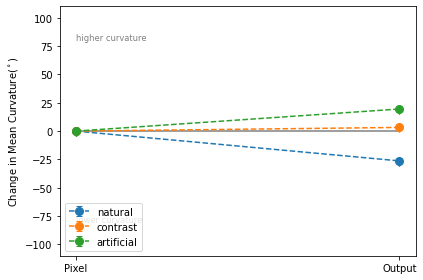

In [5]:
natural_plot = mean_natural - mean_natural[0].repeat(mean_natural.size(0))
contrast_plot = mean_contrast - mean_contrast[0].repeat(mean_contrast.size(0))
artificial_plot = mean_artificial - mean_artificial[0].repeat(mean_artificial.size(0))

xlabels = ['Pixel','Output']
output_dir = './brucenet_curves'
os.makedirs(output_dir,exist_ok=True)

plt.figure(figsize=(6,4))
plt.errorbar(xlabels, natural_plot, yerr=ste_natural, marker = 'o', linestyle='--',markersize=8,label='natural',uplims=True, lolims=True)
plt.errorbar(xlabels, contrast_plot, yerr=ste_contrast, marker = 'o', linestyle='--',markersize=8,label='contrast',uplims=True, lolims=True)
plt.errorbar(xlabels, artificial_plot, yerr=ste_artificial, marker = 'o', linestyle='--',markersize=8,label='artificial',uplims=True, lolims=True)

plt.plot([xlabels[0], xlabels[-1]],[0,0], '-', color='gray')
plt.ylim([-110, 110])
plt.ylabel('Change in Mean Curvature($^\circ$)')
plt.text(xlabels[-2], -80,'lower curvature', color='gray',fontsize='small')
plt.text(xlabels[-2], 80,'higher curvature', color='gray',fontsize='small')
plt.legend(loc='lower left')
# plt.title('Change in Curvature Across Alexnet Blocks (with PCA)', fontsize=12)
plt.tight_layout()
name = f'brucenet_{model_arch}'
save_name = os.path.join(output_dir,f'{name}_curve_change.png')
plt.savefig(save_name,dpi=300)

all_curves = {'layer_names':xlabels,'natural_curves':mean_natural, 'contrast_curves':mean_contrast,'artificial_curves':mean_artificial,
              'natural_ste':ste_natural, 'contrast_ste':ste_contrast,'artificial_ste':ste_artificial}
write_model_csv(output_dir, name, all_curves)

## BruceNet P&S Stats

In [6]:
import imp
imp.reload(ubn)

<module 'utils_brucenet' from '/data1/groups/RosenholtzLab/PredStraightening/Henaff_straightening/utils_brucenet.py'>

In [7]:
## BruceNet
model_arch = 'brucenet_PSPyr'
PS_pyr = 'UBbbbL_6:Ori=4:RadK=cos:Bound=wrap' 
PS_stats = 'ps_all'
model = ubn.BruceNet(pooling_region_size=1e20,
                     pyramid_params = PS_pyr,
                     pyramid_stats = PS_stats,
                     dummy_img=torch.rand(1,1,224,224)).cuda(device)

Creating solver: pyramid=UBBBBL_6:Bound=wrap pooling=WholeImagePooling()


In [8]:
#model_blocks = [model.solver]
model_blocks = []

In [9]:
curvs_natural = get_intermediate_curv(model, model_blocks,videos[0])
curvs_contrast = get_intermediate_curv(model, model_blocks,videos[1])
curvs_artificial = get_intermediate_curv(model, model_blocks,videos[2])

mean_natural = curvs_natural.mean(0)
mean_contrast = curvs_contrast.mean(0)
mean_artificial = curvs_artificial.mean(0)

ste_natural = curvs_natural.std(0)/11**0.5
ste_contrast = curvs_contrast.std(0)/11**0.5
ste_artificial = curvs_artificial.std(0)/11**0.5

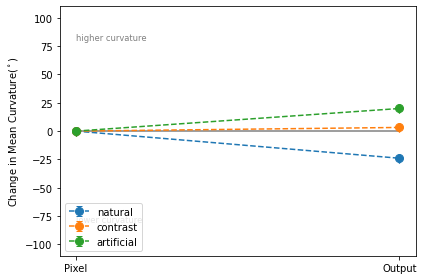

In [10]:
natural_plot = mean_natural - mean_natural[0].repeat(mean_natural.size(0))
contrast_plot = mean_contrast - mean_contrast[0].repeat(mean_contrast.size(0))
artificial_plot = mean_artificial - mean_artificial[0].repeat(mean_artificial.size(0))

xlabels = ['Pixel','Output']
output_dir = './brucenet_curves'
os.makedirs(output_dir,exist_ok=True)

plt.figure(figsize=(6,4))
plt.errorbar(xlabels, natural_plot, yerr=ste_natural, marker = 'o', linestyle='--',markersize=8,label='natural',uplims=True, lolims=True)
plt.errorbar(xlabels, contrast_plot, yerr=ste_contrast, marker = 'o', linestyle='--',markersize=8,label='contrast',uplims=True, lolims=True)
plt.errorbar(xlabels, artificial_plot, yerr=ste_artificial, marker = 'o', linestyle='--',markersize=8,label='artificial',uplims=True, lolims=True)

plt.plot([xlabels[0], xlabels[-1]],[0,0], '-', color='gray')
plt.ylim([-110, 110])
plt.ylabel('Change in Mean Curvature($^\circ$)')
plt.text(xlabels[-2], -80,'lower curvature', color='gray',fontsize='small')
plt.text(xlabels[-2], 80,'higher curvature', color='gray',fontsize='small')
plt.legend(loc='lower left')
# plt.title('Change in Curvature Across Alexnet Blocks (with PCA)', fontsize=12)
plt.tight_layout()
name = f'brucenet_{model_arch}'
save_name = os.path.join(output_dir,f'{name}_curve_change.png')
plt.savefig(save_name,dpi=300)

all_curves = {'layer_names':xlabels,'natural_curves':mean_natural, 'contrast_curves':mean_contrast,'artificial_curves':mean_artificial,
              'natural_ste':ste_natural, 'contrast_ste':ste_contrast,'artificial_ste':ste_artificial}
write_model_csv(output_dir, name, all_curves)